# Explore here

In [121]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install xgboost
!pip install missingno
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import missingno as msno
import numpy as np
from sklearn.impute import KNNImputer
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [123]:
df=pd.read_csv('/workspaces/Ejercicio-de-regresi-n-log-stica/data/raw/bank-marketing-campaign-data.csv')
pd.set_option('display.max_columns', None)
df.head()

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."


In [124]:
# Modificamos el separador a ;
df=pd.read_csv('/workspaces/Ejercicio-de-regresi-n-log-stica/data/raw/bank-marketing-campaign-data.csv',sep=';')
pd.set_option('display.max_columns', None)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [125]:
df.shape

(41188, 21)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [127]:
# Verificamos si tenemos alguna variable constante
n_unicos = df.nunique()
n_unicos

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [128]:
# Comprobamos duplicados
df.duplicated().sum()

np.int64(12)

In [129]:
#Eliminamos duplicados
df.drop_duplicates(inplace= True)
df.shape

(41176, 21)

In [130]:
# Revisamos si hay valores faltantes
df.isnull().mean()*100

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

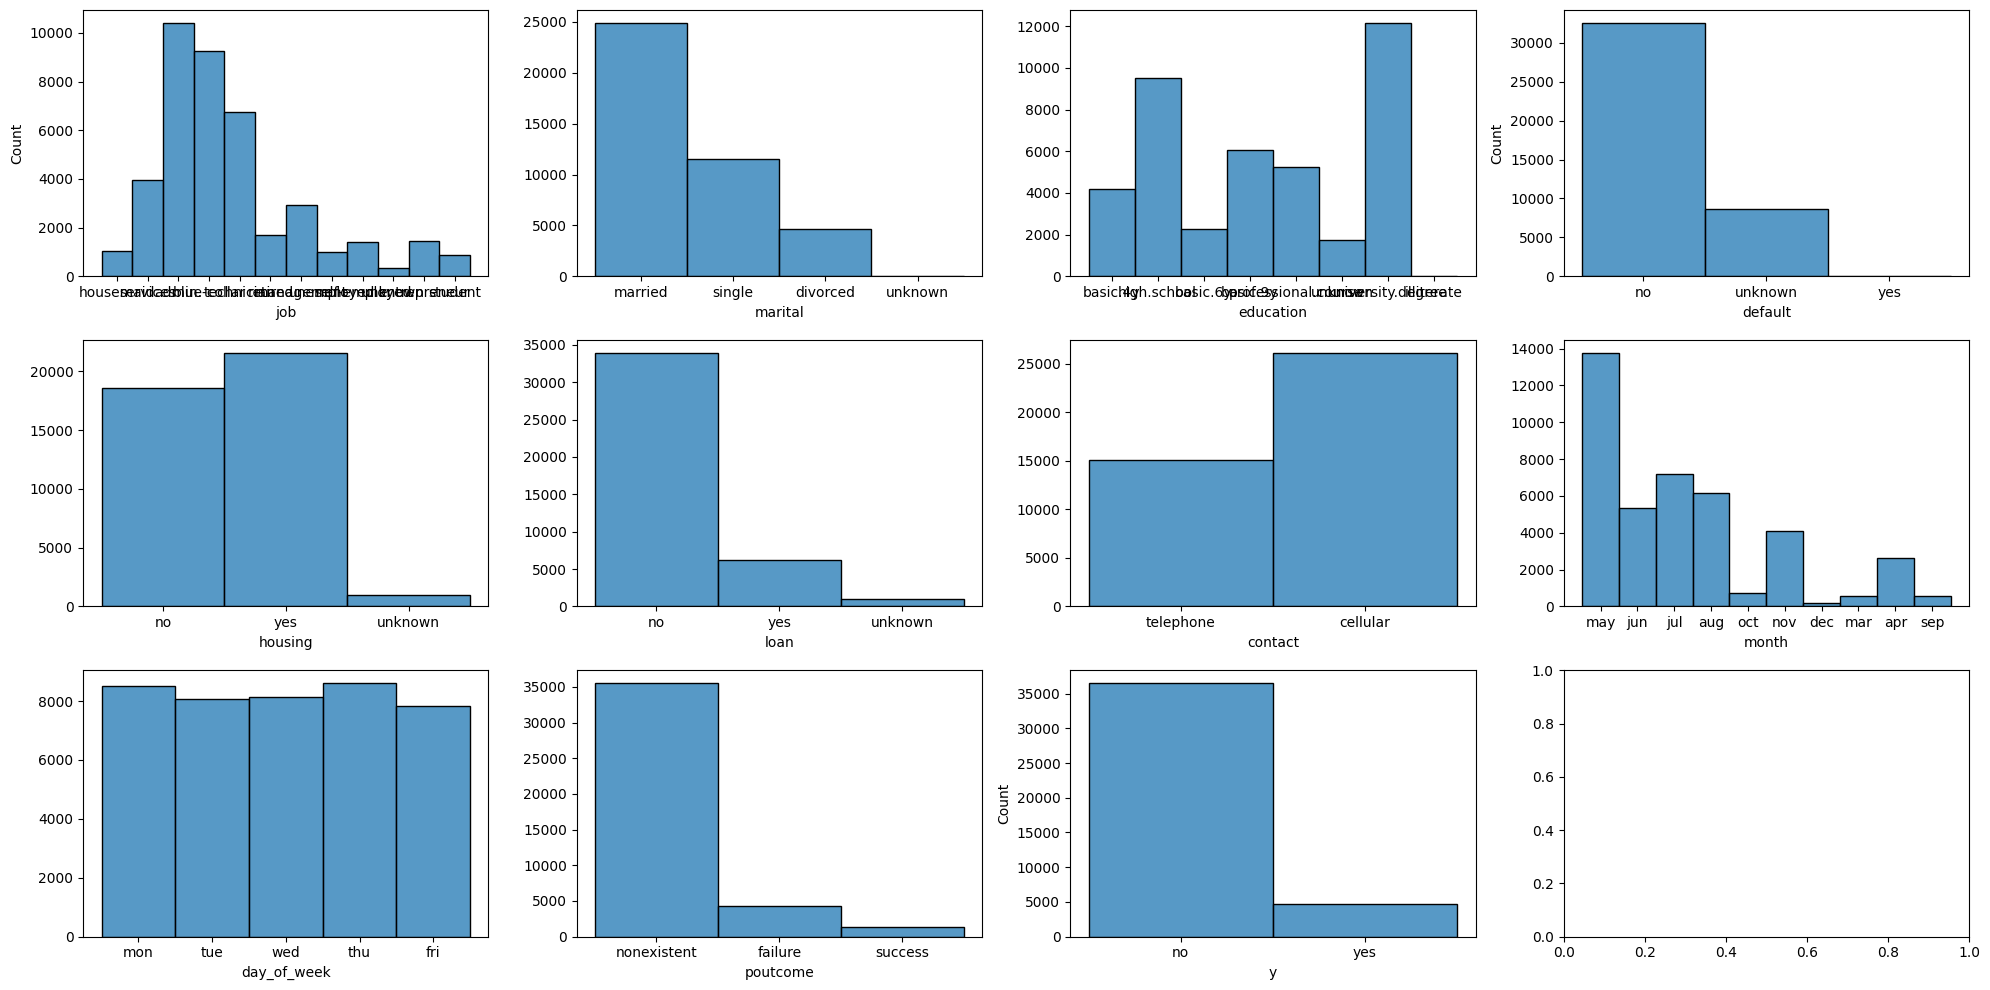

In [131]:
# analisis de variables categóricas
fig, axis = plt.subplots(3, 4, figsize = (20, 10))

# Crear un histograma múltiple
sns.histplot(ax = axis[0, 0], data = df, x = "job")
sns.histplot(ax = axis[0, 1], data = df, x = "marital").set(ylabel = None)
sns.histplot(ax = axis[0, 2], data = df, x = "education").set(ylabel = None)
sns.histplot(ax = axis[0, 3], data = df, x = "default")
sns.histplot(ax = axis[1, 0], data = df, x = "housing").set(ylabel = None)
sns.histplot(ax = axis[1, 1], data = df, x = "loan").set(ylabel = None)
sns.histplot(ax = axis[1, 2], data = df, x = "contact").set(ylabel = None)
sns.histplot(ax = axis[1, 3], data = df, x = "month").set(ylabel = None)
sns.histplot(ax = axis[2, 0], data = df, x = "day_of_week").set(ylabel = None)
sns.histplot(ax = axis[2, 1], data = df, x = "poutcome").set(ylabel = None)
sns.histplot(ax = axis[2, 2], data = df, x = "y")


plt.tight_layout()
plt.show()

In [132]:
# Vemos en las gráficas que tenemos valores como "desconocido", que no nos han aparecido como valores nulos. Por este motivo, renombramos los valores 
# desconocidos o que no existen como Nan para poder comprobar los valores nulos reales que tenemos en nuestro dataset

df.replace(['unknown','999', 'nonexistent'], np.nan,inplace=True)
df.isnull().mean()*100

age                0.000000
job                0.801438
marital            0.194288
education          4.201477
default           20.876239
housing            2.404313
loan               2.404313
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome          86.339130
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
y                  0.000000
dtype: float64

Con los datos que visualizamos en las graficas,junto con los nuevos valores nulos, decidimos tomar las siguientes medidas:

- Eliminar las siguientes columnas que consideramos que no aportan información relevante: Day_of_week, Contact, pdays, nr.employed, job
- Eliminar la siguiente columna al tener un alto número de valores nulos: poutcome 
- ELiminar la columna default por redundancia con cŕedito vivienda y crédito perosnal, y por alto número de valores nulos
- Utilizar la matriz misingno dado que parece que hay un patron entre los valores nulos de la columna loan y housing

<Axes: >

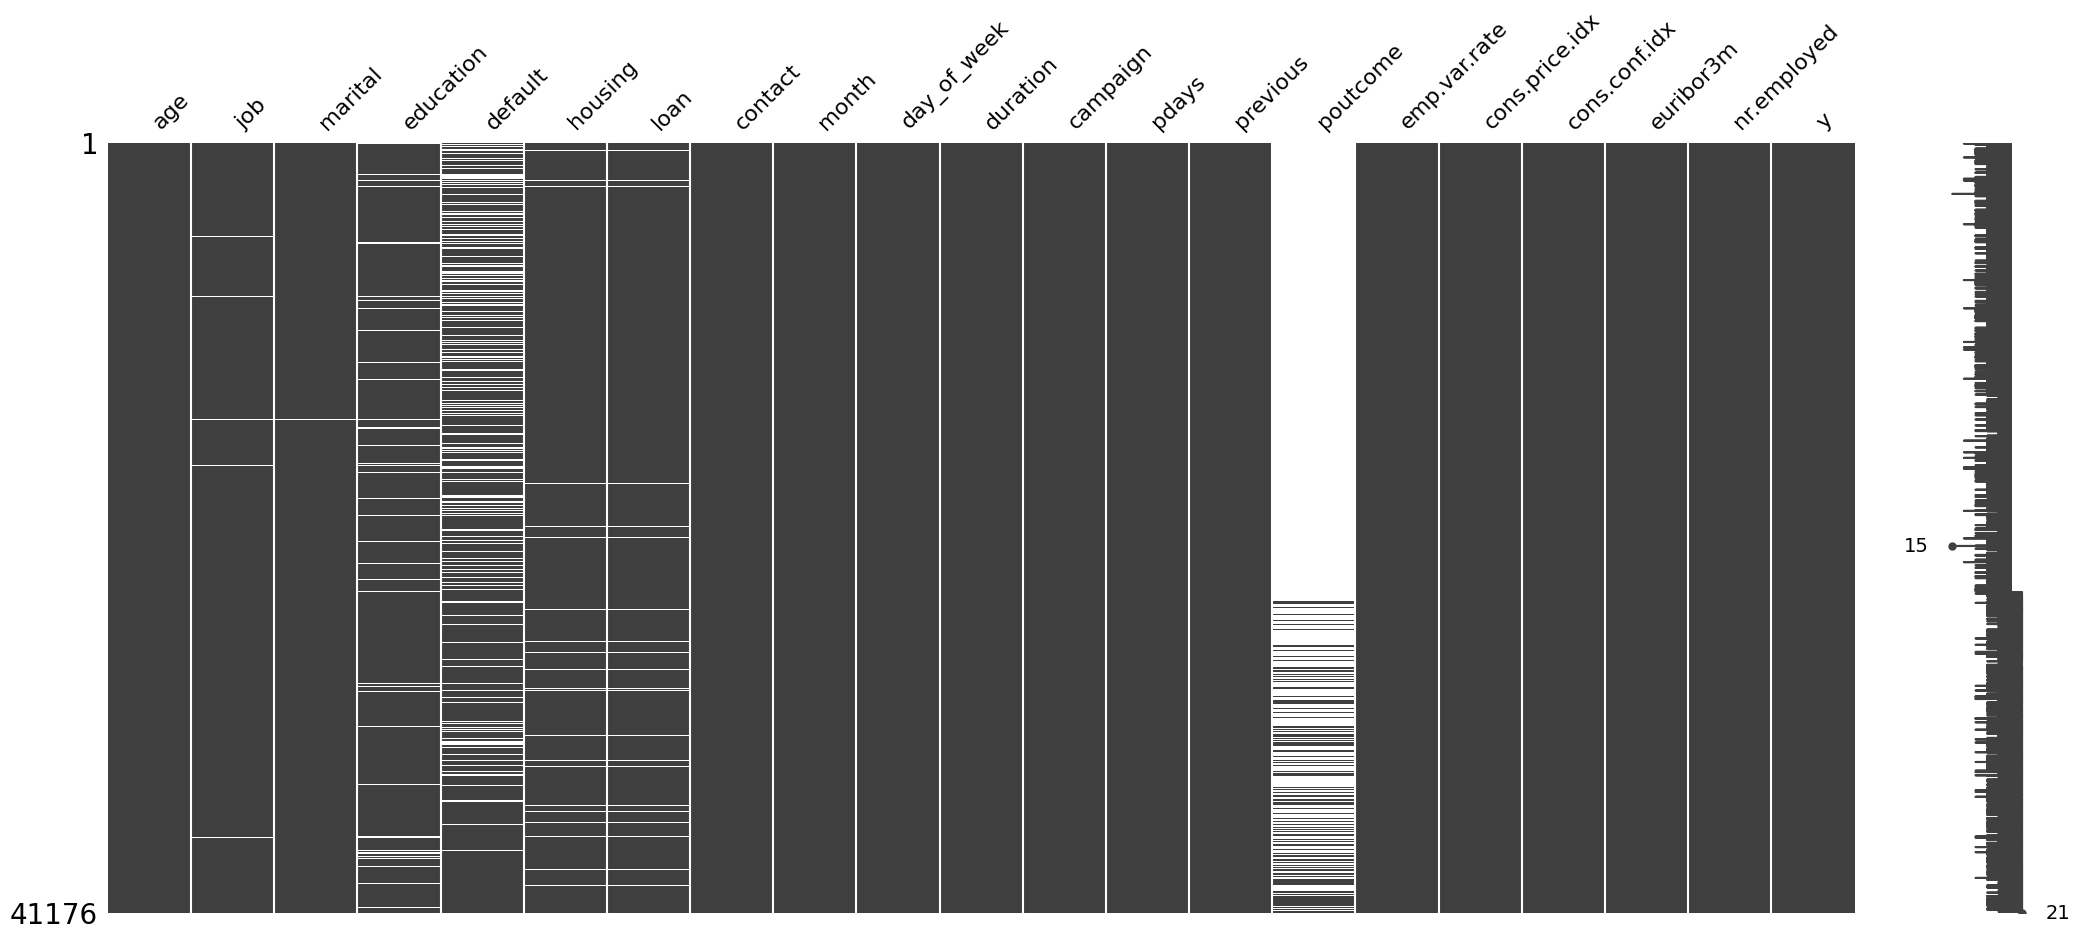

In [133]:
msno.matrix(df)

In [134]:
# Eliminamos las variables que consideramos que no nos apoartan información
df.drop(['day_of_week','contact','poutcome','default','pdays','nr.employed'],axis=1, inplace = True)
df.shape

(41176, 15)

In [135]:
# Con las variblaes con datos faltantes(job, marital, education, housing, loan) les imputamos valores utilizando la moda:

moda_job = df['job'].mode()[0]
df['job'].fillna(moda_job, inplace = True)

moda_marital = df['marital'].mode()[0]
df['marital'].fillna(moda_marital, inplace = True)

moda_education =df['education'].mode()[0]
df['education'].fillna(moda_education, inplace = True)

moda_housing =df['housing'].mode()[0]
df['housing'].fillna(moda_housing, inplace = True)

moda_loan =df['loan'].mode()[0]
df['loan'].fillna(moda_loan, inplace = True)

#Comprobamos que los valores desconocidos se han modificado
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   housing         41176 non-null  object 
 5   loan            41176 non-null  object 
 6   month           41176 non-null  object 
 7   duration        41176 non-null  int64  
 8   campaign        41176 non-null  int64  
 9   previous        41176 non-null  int64  
 10  emp.var.rate    41176 non-null  float64
 11  cons.price.idx  41176 non-null  float64
 12  cons.conf.idx   41176 non-null  float64
 13  euribor3m       41176 non-null  float64
 14  y               41176 non-null  object 
dtypes: float64(4), int64(4), object(7)
memory usage: 5.0+ MB


/tmp/ipykernel_27495/3763657118.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['job'].fillna(moda_job, inplace = True)
/tmp/ipykernel_27495/3763657118.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

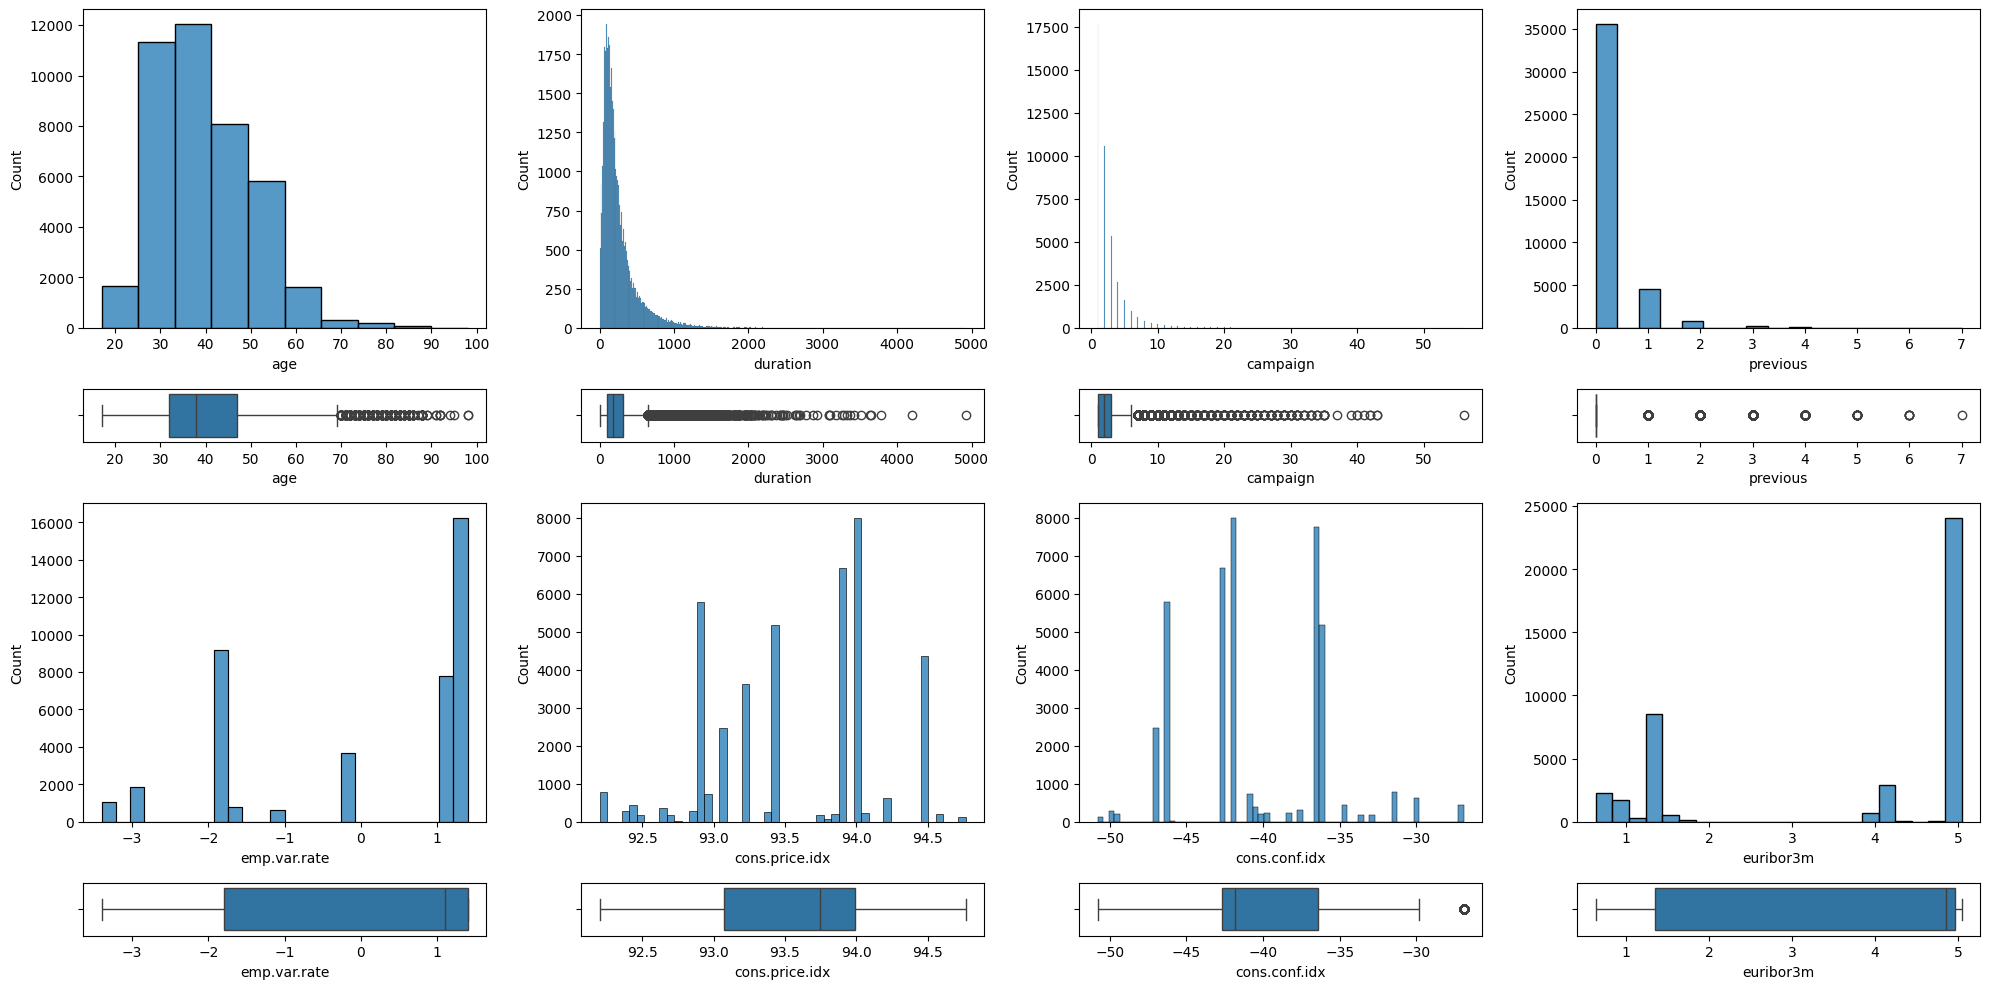

In [136]:
#Análisis de variables Univariante númericas
fig, axis = plt.subplots(4, 4, figsize = (20, 10) ,gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = df, x = "age", bins=10)
sns.boxplot(ax = axis[1, 0], data = df, x = "age")                      
sns.histplot(ax = axis[0, 1], data = df, x = "duration")
sns.boxplot(ax = axis[1, 1], data = df, x = "duration")
sns.histplot(ax = axis[0, 2], data = df, x = "campaign")
sns.boxplot(ax = axis[1, 2], data = df, x = "campaign")
sns.histplot(ax = axis[0, 3], data = df, x = "previous")
sns.boxplot(ax = axis[1, 3], data = df, x = "previous")
sns.histplot(ax = axis[2, 0], data = df, x = "emp.var.rate")
sns.boxplot(ax = axis[3, 0], data = df, x = "emp.var.rate")
sns.histplot(ax = axis[2, 1], data = df, x = "cons.price.idx")
sns.boxplot(ax = axis[3, 1], data = df, x = "cons.price.idx")
sns.histplot(ax = axis[2, 2], data = df, x = "cons.conf.idx")
sns.boxplot(ax = axis[3, 2], data = df, x = "cons.conf.idx")
sns.histplot(ax = axis[2, 3], data = df, x = "euribor3m")
sns.boxplot(ax = axis[3, 3], data = df, x = "euribor3m")

plt.tight_layout()
plt.show()

De las graficas que vemos arriba observamos lo siguiente:
- La mayoría de los valores de edad están entre los 30 y 40 años, a partir de esta edad se ven bastante reducidos-
- La duración de la llamada está altamente sesgada hacia el lado izquierdo donde se encuentran los valores más bajos.
- La mayoría de los datos de la columna previous son 0, lo que nos indica que la mayoría de los clientes no fueron contactados antes.


In [137]:
# Para poder iniciar el analisis de variables multivariadas comparando connuestro target, pasamos nuestro target a variable numérica.
df['y']= df['y'].map({'yes': 1,'no':0}).astype(int)

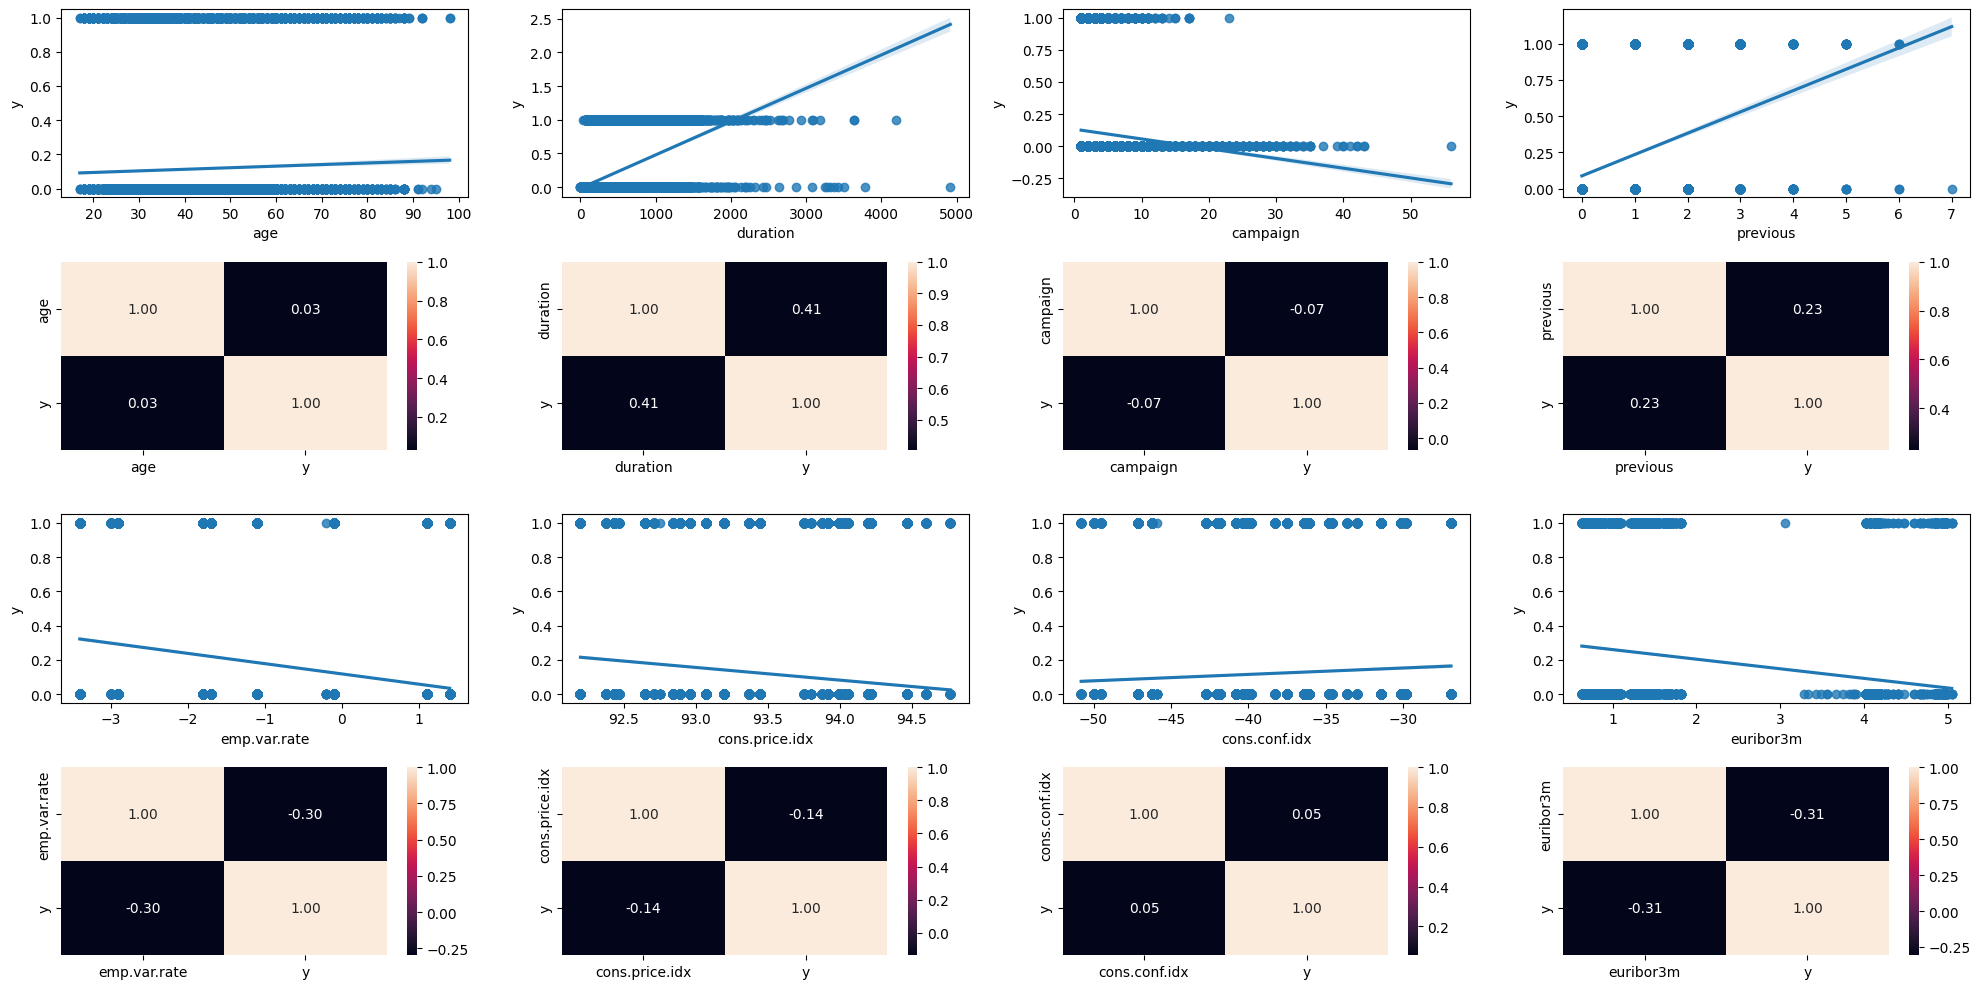

In [138]:
# Análisis de variables multivariadas
## NUmérico-Numérico

fig, axis = plt.subplots(4, 4, figsize = (20,10))

sns.regplot(ax = axis[0, 0], data = df, x = "age", y = "y")
sns.heatmap(df[["age", "y"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0])
sns.regplot(ax = axis[0, 1], data = df, x = "duration", y = "y")
sns.heatmap(df[["duration", "y"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])
sns.regplot(ax = axis[0, 2], data = df, x = "campaign", y = "y")
sns.heatmap(df[["campaign", "y"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2])
sns.regplot(ax = axis[0, 3], data = df, x = "previous", y = "y")
sns.heatmap(df[["previous", "y"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 3])
sns.regplot(ax = axis[2, 0], data = df, x = "emp.var.rate", y = "y")
sns.heatmap(df[["emp.var.rate", "y"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0])
sns.regplot(ax = axis[2, 1], data = df, x = "cons.price.idx", y = "y")
sns.heatmap(df[["cons.price.idx", "y"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])
sns.regplot(ax = axis[2, 2], data = df, x = "cons.conf.idx", y = "y")
sns.heatmap(df[["cons.conf.idx", "y"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 2])
sns.regplot(ax = axis[2, 3], data = df, x = "euribor3m", y = "y")
sns.heatmap(df[["euribor3m", "y"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 3])
    
# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Según las gráficas que vemos arriba, observamos que a grandes rasgos apenas hay correlació entre lkas variables numéricas y la target.

Podemos destacar que la variable que más correlación presenta es la de duración, en la que según aumenta el tiempo de la llamada es probable que contraten el depósito.

También hay que mencionar que tenemos 2 variables con correlación negativa a más pronunciada, como son la tasa de variación de emplo y el euribor. En ambos casos, cuando más baja es la tasa o el euribor, más aumenta las posibilidades de que contrten el depósito.

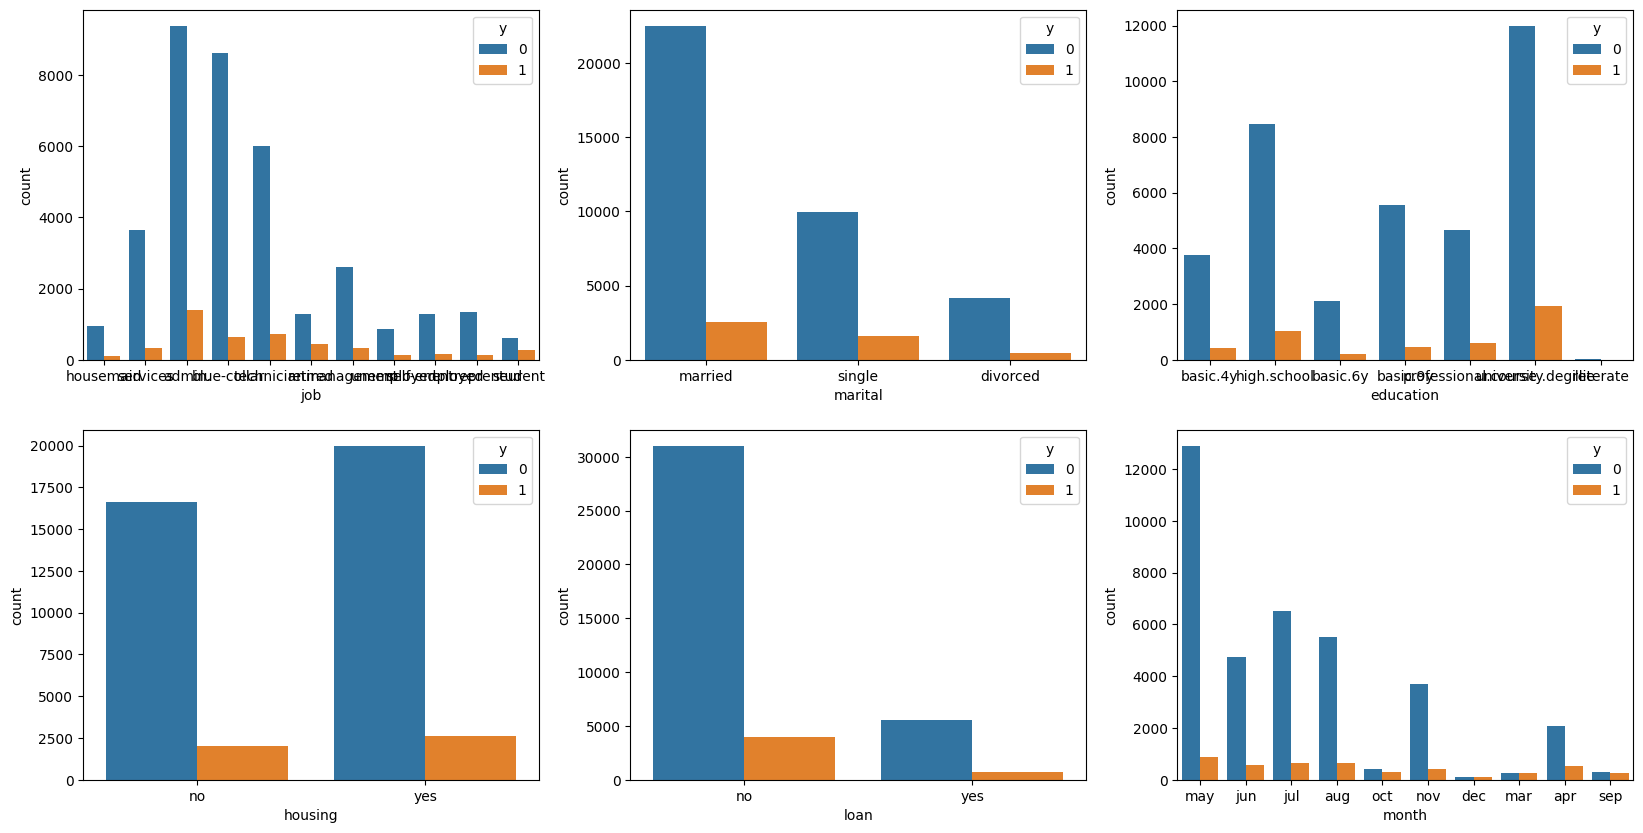

In [139]:
## Análisis categortico-categórico

fig, axis = plt.subplots(2, 3, figsize = (20, 10))
sns.countplot(ax= axis [0,0],data = df, x = "job", hue = "y")
sns.countplot(ax= axis [0,1],data = df, x = "marital", hue = "y")
sns.countplot(ax= axis [0,2],data = df, x = "education", hue = "y")
sns.countplot(ax= axis [1,0],data = df, x = "housing", hue = "y")
sns.countplot(ax= axis [1,1],data = df, x = "loan", hue = "y")
sns.countplot(ax= axis [1,2],data = df, x = "month", hue = "y")

plt.show()

In [140]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.023800,10.420680,17.000,32.000,38.000,47.000,98.000
duration,41176.0,258.315815,259.305321,0.000,102.000,180.000,319.000,4918.000
campaign,41176.0,2.567879,2.770318,1.000,1.000,2.000,3.000,56.000
previous,41176.0,0.173013,0.494964,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41176.0,0.081922,1.570883,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41176.0,93.575720,0.578839,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41176.0,-40.502863,4.627860,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41176.0,3.621293,1.734437,0.634,1.344,4.857,4.961,5.045
y,41176.0,0.112663,0.316184,0.000,0.000,0.000,0.000,1.000


In [141]:
#Factorizamos las variables categoricas para transformarlas a numérico 
df['job'] = pd.factorize(df['job'])[0]
df['marital'] = pd.factorize(df['marital'])[0]
df['education']= pd.factorize(df['education'])[0]
df['housing'] = pd.factorize(df['housing'])[0]
df['loan'] = pd.factorize(df['loan'])[0]
df['month']= pd.factorize(df['month'])[0]
df['y']= pd.factorize(df['y'])[0]

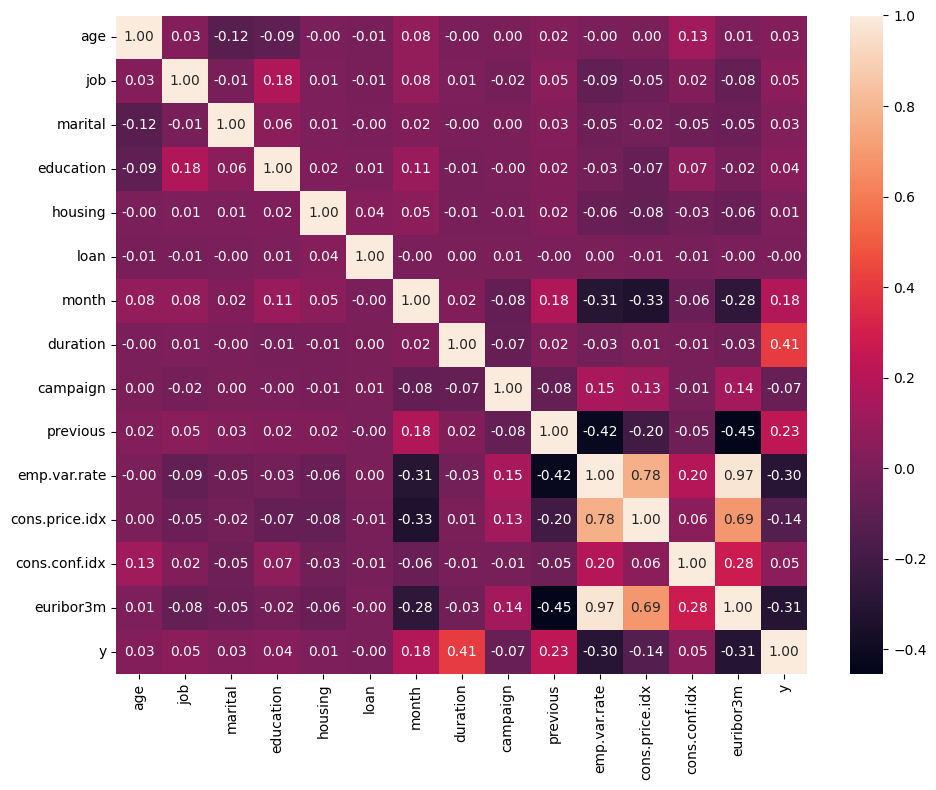

In [142]:
fig, axes = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

En el gráfico anterior obervamos lo siguiente:
-  En relacióna nuestro target, vemos que hay correlación positiva a destacar con la varible duración de la llamada. Tambien existe correlación negativa alta entre el euribor y la tasa de variación de empleo con nuestra target.

-Las correlaciones positivas más altas las vemos entre  el índice de confianza del consumidor y la tasa de variación de empleo

-Por otro lado, las correlaciones negativas más elevadas, las encontramos entre el contacto previo y el euribor, la tasa de variación de empleo y el euribor.

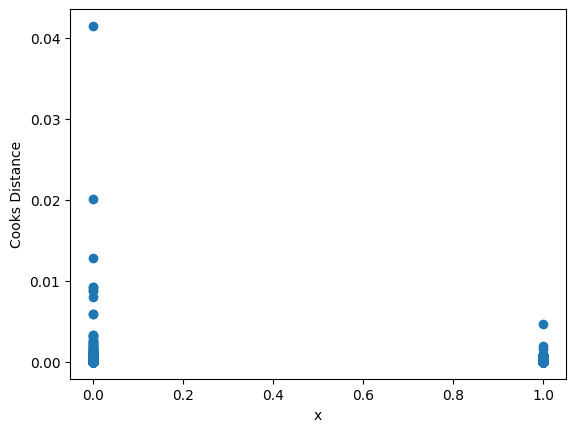

In [143]:
# Identificamos observaciones influyentes
X= df.drop(['y'], axis = 1 )
y = df['y']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
cooks_distance = model.get_influence().cooks_distance
plt.scatter(df['y'], cooks_distance[0])
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.show()

In [144]:
#Punto de corte para la distancia de cook
pto_corte = 4/len(df)

# Observaciones por encima del pto de corte
len(np.where(cooks_distance[0]>pto_corte)[0])

5602

In [145]:
np.where(cooks_distance[0]>0.02)

(array([24084, 40525]),)

In [146]:
# Averiguamos las posiciones de las filas a eliminar y las eliminamos por nº de índice
posiciones = np.where(cooks_distance[0]>pto_corte)[0]
indices_a_eliminar= df.iloc[posiciones].index
df.drop(indices_a_eliminar, inplace= True)
df.shape

(35574, 15)

In [147]:
# Escalamos las variables
total_variables = ['age','duration','campaign','previous','emp.var.rate','job','marital', 'education','housing','loan','month','y','cons.price.idx','cons.conf.idx','euribor3m']

scaler =MinMaxScaler()
var_total_scal = scaler.fit_transform(df[total_variables])
df_escal = pd.DataFrame(var_total_scal, index = df.index, columns = total_variables)

In [148]:
# Separamos las variables independientes de la dependiente
X = df_escal.drop(['y'], axis=1)
y = df_escal['y']

#Separamos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [149]:
#Selección de características (Importancia de las variables) con XGBoost Classifier
xgb_model =xgb.XGBClassifier(objective= 'binary:logistic',random_state =42).fit(X_train,y_train)
df_impo = pd.DataFrame({'Feature':X_train.columns, 'Importance':xgb_model.feature_importances_*100})
df_impo = df_impo.sort_values(by='Importance', ascending=False)
df_impo

,Feature,Importance
4,emp.var.rate,38.180004
1,duration,29.002476
13,euribor3m,15.191046
10,month,4.863198
11,cons.price.idx,2.309323
3,previous,2.301529
7,education,2.238596
12,cons.conf.idx,1.302866
5,job,1.090985
6,marital,0.951708


In [150]:
# Seleccionamos las características que presentan más de un 1% de importancia
X_train =X_train[df_impo[df_impo.Importance>1]['Feature'].values]
X_test =X_test[df_impo[df_impo.Importance>1]['Feature'].values]

<Axes: >

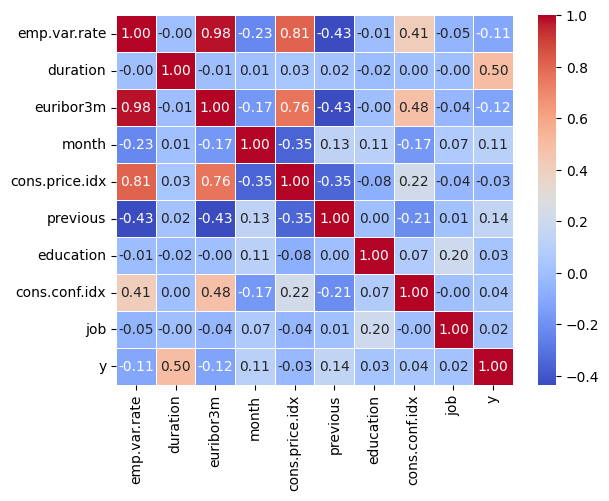

In [151]:
#VIF
X_corr = X_train.copy()
X_corr['y'] = y_train
corr = X_corr.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

In [152]:
# Eliminamos las variables euribory cons.price.idx al estar muy relacionada con la tasa de variación de empleo, así evitamos redundancia
X_train.drop(['euribor3m','cons.price.idx'], axis =1, inplace=True)
X_test.drop(['euribor3m','cons.price.idx'],axis =1, inplace=True)

In [120]:
#Creamos y entrenamos el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred
accuracy_score(y_test, y_pred)

0.9971890372452565

El modelo predice con una precisión del 99%